In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [5]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [6]:
df = df.drop('emp_title',axis=1)
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [7]:
df = df.drop('emp_length',axis=1)

In [8]:
df = df.drop('title',axis=1)

In [9]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [10]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [11]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [12]:
df = df.dropna()

In [13]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [14]:
df = df.drop('grade',axis=1)

In [15]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [16]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [17]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [18]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [19]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [20]:
df = df.drop('issue_d',axis=1)

In [21]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

# PyCaret

In [22]:
from pycaret.classification import *

In [23]:
model = setup(df,target='loan_repaid',session_id=69)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,69
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(395219, 78)"
4,Missing Values,False
5,Numeric Features,74
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Ridge Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.999900
3,Quadratic Discriminant Analysis,1.000000,0.999900,1.000000,1.000000,1.000000,0.999900
4,Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Extra Trees Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,Extreme Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,Light Gradient Boosting Machine,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
the_chosen_one = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0


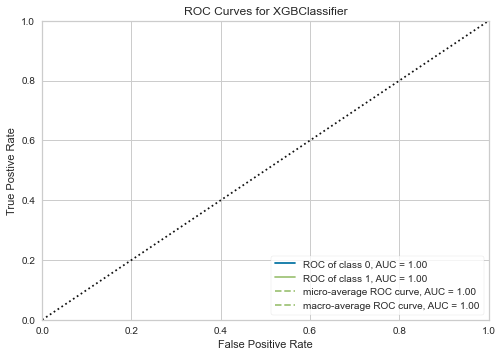

In [26]:
plot_model(the_chosen_one)

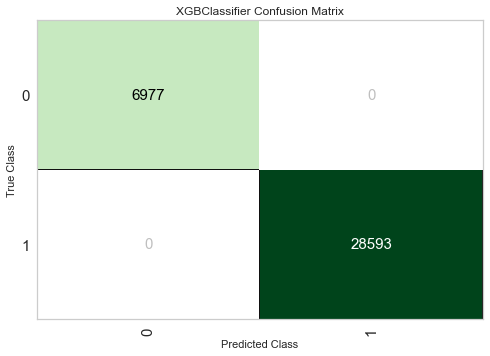

In [27]:
plot_model(the_chosen_one,'confusion_matrix')

In [28]:
predictions = predict_model(the_chosen_one)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
save_model(the_chosen_one,'loan_xgboost')

Transformation Pipeline and Model Succesfully Saved


In [33]:
import shap